<a href="https://colab.research.google.com/github/ISEA-Repositories/MLsessions/blob/main/DecisionTrees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree


In [2]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

# fetch dataset
raw = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = raw.data.features
y = raw.data.targets

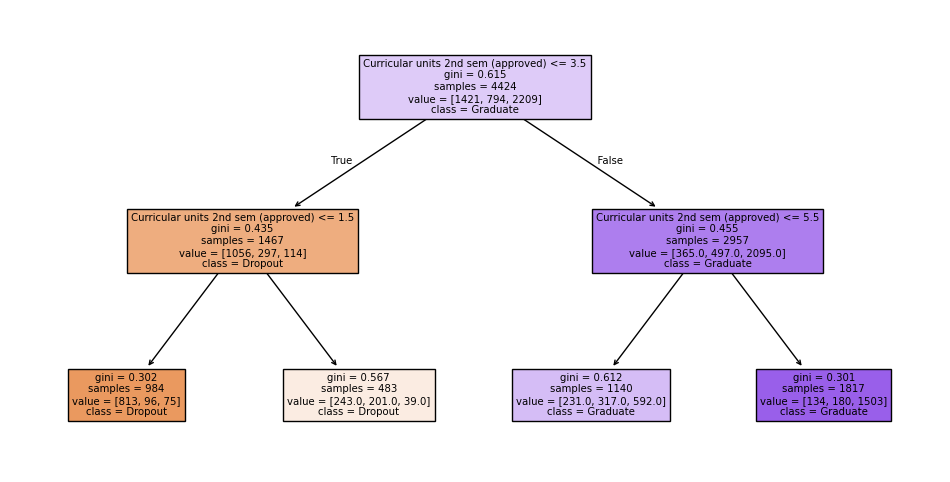

Decision Tree Training Accuracy: 0.71


In [4]:
# Create and train the decision tree classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=2)
clf.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(12, 6))
plot_tree(clf, feature_names=X.columns, class_names = np.unique( y), filled=True)
plt.show()

# Evaluate model accuracy
accuracy = clf.score(X, y)
print(f"Decision Tree Training Accuracy: {accuracy:.2f}")

Now lets make the tree bigger, we won't print it because that won't render here in colab, but we will check the accuracy

In [8]:
# Create and train the decision tree classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=20)
clf.fit(X, y)

# Evaluate model accuracy
accuracy = clf.score(X, y)
print(f"Decision Tree Accuracy: {accuracy:.2f}")


Decision Tree Accuracy: 1.00


Wow! 100% accuracy! Is this real?

Let's do a test-train split and check

In [11]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the decision tree classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=20)
clf.fit(X_train, y_train)

# Evaluate model accuracy on training data
accuracy = clf.score(X_train, y_train)
print(f"Decision Tree Training Accuracy: {accuracy:.2f}")

# Evaluate model accuracy on test data
accuracy = clf.score(X_test, y_test)
print(f"Decision Tree Test Accuracy: {accuracy:.2f}")

Decision Tree Training Accuracy: 0.99
Decision Tree Test Accuracy: 0.68


The training accuracy stayed super high, but the test accuracy is way lower. What's going on? Overfitting